In [2502]:
import random as rd
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2503]:
import math
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

print (nCr(4,2))

6.0


In [2504]:
#list(it.permutations('abcd',2))
#combinations are unique groups (order no matter/as in order not a distinct group)
#permutations are any groups but no replacement

print(len(list(it.permutations('abcd',2)))
,len(list(it.combinations('abcd',2)))
,len(list(it.combinations_with_replacement('abcd',2)))
,len(list(it.product('abcd','abcd'))))

all_possible = list([int(w),int(x),int(y),int(z)] for w,x,y,z in it.product('0123456789','0123456789','0123456789','0123456789'))

12 6 10 16


In [2654]:
pl2 = [rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]

In [2506]:
#pl2

In [2507]:
#shuffle to make random guesses where you try every possible combination
dd=all_possible.copy()
rd.shuffle(dd)
#dd
gg = []
for sample in range(15):
    if (sample+1)%5==0:
        print(sample+1)
    cc=0
    rounds=[]
    while cc<sample+1:
        rd.shuffle(dd)
        for index,gus in enumerate(dd):
            #gus = Y#[rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]
            #print(gus)
            fijas = 0
            picas = 0
            for z in set(gus):
                #print(z)
                fij = len(set([i for i,x in enumerate(pl2) if x == z]\
                             ).intersection([i for i,x in enumerate(gus) if x == z]))
                if fij>0:
                #print(fij)
                    fijas += fij
                else:
                    if z in pl2:
                        picas += 1
            #print('fijas:',fijas,',','picas:',picas)
            if fijas ==4:
                rounds.append(index)
                #print(index,gus)
                #print('fijas:',fijas,',','picas:',picas)
                break
        cc +=1
    gg.append(np.mean(rounds))
gg

5
10


KeyboardInterrupt: 

(array([ 1.,  0.,  1.,  5.,  2.,  2.,  0.,  0.,  0.,  1.]),
 array([ 1828.5 ,  2573.25,  3318.  ,  4062.75,  4807.5 ,  5552.25,
         6297.  ,  7041.75,  7786.5 ,  8531.25,  9276.  ]),
 <a list of 10 Patch objects>)

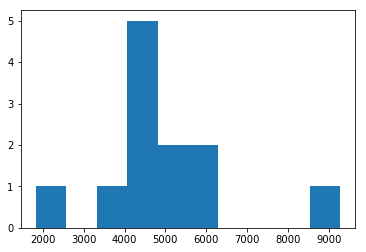

In [2508]:
#plt.plot(gg)
plt.hist(gg)

In [2509]:
np.mean(gg)

4999.8593494468496

In [2510]:
def testguess(answer,guess):
    '''returns [SumFijaPica, Fija, Pica]'''
    fijas = 0
    picas = 0
    for z in set(guess):
        fij = len(set([i for i,x in enumerate(answer) if x == z]\
                     ).intersection([i for i,x in enumerate(guess) if x == z]))
        if fij>0:
            fijas += fij
            if fijas ==4:
                print(guess,'WIN')
                break  
        else:
            if z in answer:
                picas += 1
    return [fijas+picas,fijas,picas]

In [2562]:
def evaluate(current,new):
    ''' Used to evaluate change in guesses
    [SUM_fijaPica, Fija, Pica]'''
    return [b-a for a, b in zip(testguess(pl2,current), testguess(pl2,new))]

In [2574]:
def decide(current,new):
    #print(evaluate(current,new)[1],'',testguess(pl2,current)[1])
    if evaluate(current,new)[1]>testguess(pl2,current)[1]:
        #print(new,evaluate(current,new),testguess(pl2,new))
        return new
    else:
        return current

In [2530]:
def fijas(answer,guess):
    """solves for 1 fija if have a pica"""
    for x in range(26):
        t =testguess(answer,guess)
        #print([x,guess,testguess(answer,guess)])
        if t[0]==0:
            print('Nothing!')
            break
        if t[1]>0:
            print('rounds ->',x+1,',fija:',\
                  testguess(answer,guess)[1],'pica:',testguess(answer,guess)[2],'sum_fp:',t[0])
            return [guess,testguess(answer,guess),'rounds->',x+1]
            break
        else:
            guess.append(guess.pop(0))

In [2531]:
def fijas2(answer,guess):
    """solves for 1 fija if have a pica"""
    h=guess
    b=[h,[h[1],h[0],h[2],h[3]],[h[1],h[0],h[3],h[2]],[h[3],h[2],h[1],h[0]],[h[3],h[2],h[0],h[1]],[h[2],h[3],h[0],h[1]]]
    for x,va in enumerate(b):
        t =testguess(answer,va)
        #print([x,guess,testguess(answer,guess)])
        if t[0]==0:
            print('Nothing!')
            break
        if t[1]>0:
            print('rounds ->',x+1,',fija:',\
                  testguess(answer,va)[1],'pica:',testguess(answer,va)[2],'sum_fp:',t[0])
            return [va,testguess(answer,va),'rounds->',x+1]
            break

In [2532]:
def rotate(l, n):
    return l[-n:]+ l[:-n]

In [2533]:
h=[0,1,2,3]
b=[h,[h[1],h[0],h[2],h[3]],[h[1],h[0],h[3],h[2]],[h[3],h[2],h[1],h[0]],[h[3],h[2],h[0],h[1]],[h[2],h[3],h[0],h[1]]]
for i,c in enumerate(b):
    print(i)

0
1
2
3
4
5


In [3020]:
pl2 = [rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]

In [2803]:
pl2 #[9, 6, 6, 6]

[9, 6, 6, 6]

In [2816]:
ll=(i for i in range(10))

j=[next(ll),next(ll),next(ll),next(ll)]
if fijas(pl2,j)is None:
    j=[next(ll),next(ll),next(ll),next(ll)]
    fijas(pl2,j)
else:
    fijas(pl2,j)
if testguess(pl2,j)[0]==1: #Sum Picafija=1
    if testguess(pl2,j)[1]==1:#Sum Fija
        if evaluate(j,[j[0]]+rotate(j[1:],1))[1]<0:
            #hold first decrease means drop first
            z=0
            print(z)
        if evaluate(j,[j[3],j[1],j[0],j[2]])[1]<0:
            z=1
            print(z)
        if evaluate(j,[j[3],j[0],j[2],j[1]])[1]<0:
            z=2
            print(z)
        if evaluate(j,rotate(j[:3],1)+[j[-1]])[1]<0:
            z=3
            print(z)
m=j.copy()
m[z]=next(ll)
if evaluate(j,m)[0]==0:
    m[z]=next(ll)
else:
    j=m
if evaluate(j,m)[0]==0:
    m[z]=next(ll)
else:
    j=m
#j[z]=next(ll)
#print(testguess(pl2,j)[0])
if testguess(pl2,j)[0]==2:
    knownFijaposition=[z]
    print(j)

Nothing!
rounds -> 1 ,fija: 1 pica: 0 sum_fp: 1
3
[4, 5, 6, 9]


In [2818]:
# j[3]=8
j
testguess(pl2,j)

[2, 1, 1]

In [2819]:
evaluate(j,[9,5,4,6])

[0, 1, -1]

In [2820]:
testguess(pl2,[9,5,4,6])

[2, 2, 0]

In [2807]:
j=[4,5,6,9]

In [2808]:
evaluate([4,5,6,7],[4, 5, 6, 8])

[0, 0, 0]

In [2801]:
j

[4, 5, 6, 9]

In [ ]:
print(evaluate(j,[j[0]]+rotate(j[1:],1) ),#hold first decrease means drop first
evaluate(j,[j[3],j[1],j[0],j[2]] ), #hold 2nd decrease means drop 2nd
evaluate(j,[j[3],j[0],j[2],j[1]] ), #hold 3rd decrease means drop 3rd
evaluate(j,rotate(j[:3],1)+[j[-1]] ) ) #hold last decrease means drop last

In [2802]:
print(evaluate(j,[j[0]]+rotate(j[1:],1) ),#hold first decrease means drop first
evaluate(j,[j[3],j[1],j[0],j[2]] ), #hold 2nd decrease means drop 2nd
evaluate(j,[j[3],j[0],j[2],j[1]] ), #hold 3rd decrease means drop 3rd
evaluate(j,rotate(j[:3],1)+[j[-1]] ) ) #hold last decrease means drop last

[0, 0, 0] [0, 1, -1] [0, 1, -1] [0, -1, 1]


In [2838]:
[d for d in range(max(pop)+1,10)]
pop

[2, 9, 4, 6]

In [2845]:
pl2

[9, 6, 6, 6]

In [2896]:
def holdSwap(lis, hold):
    m=[y for y in range(4) if y not in hold]
    #print(m)
    x=[0,0,0,0]
    x[hold[0]]=lis[hold[0]]
    x[hold[1]]=lis[hold[1]]
    x[m[0]]=lis[m[1]]
    x[m[1]]=lis[m[0]]
    return x

In [2925]:
sorted([y for y in range(10) if y not in pop],reverse=True)

[9, 8, 3, 2, 1, 0]

In [3026]:
def addnewNumber(lis):
    pos=0
    m=[y for y in range(10) if y not in lis]#sorted([y for y in range(10) if y not in lis],reverse=True)
    x=lis.copy()
    print(x,m)
    for l in m:
        x[pos]=l
        print(1,evaluate(lis,x),lis,x)
        if evaluate(lis,x)[1]<0 and evaluate(lis,x)[0]<0:
            pos+=1
            x=lis.copy()
            print('return')
        elif evaluate(lis,x)[1]<0 and evaluate(lis,x)[0]>=0:
            pos+=1
            x=lis.copy()
            m.append(l)
            print('return but..')
        elif evaluate(lis,x)[0]>0:
            return x
        #print(2,evaluate(lis,x),lis,x)
#     x[hold[1]]=lis[hold[1]]
#     x[m[0]]=lis[m[1]]
#     x[m[1]]=lis[m[0]]
#     return x

In [3008]:
#print(pop)
#pl2=[9, 6, 6, 6]
pop1=[9,5,6,7]
# pop=[4,5,6,7]
addnewNumber(pop1)
# print(pop)
# pop1 = addnewNumber(pop)
# print(pop1)
# testguess(pl2,pop1)

[9, 5, 6, 7] [0, 1, 2, 3, 4, 8]
1 [-1, -1, 0] [9, 5, 6, 7] [0, 5, 6, 7]
return
1 [0, 0, 0] [9, 5, 6, 7] [9, 1, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 2, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 3, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 4, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 8, 6, 7]


In [2899]:
for h in [ [int(x),int(y)] for x,y in it.combinations('0123',2)]:
    contender = holdSwap(pop,h)
    if evaluate(pop,contender)[1]>0:
        pop = contender
        print(holdSwap(pop,h),evaluate(pop,contender))
        break
print(pop)


[2, 9, 6, 4] [0, 0, 0]
[2, 6, 4, 9] [0, 0, 0]
[2, 4, 9, 6] [0, 0, 0]
[6, 9, 4, 2] [0, -1, 1]
[4, 9, 2, 6] [0, 0, 0]
[9, 2, 4, 6] [0, 1, -1]
[2, 9, 4, 6]


In [2890]:
print(holdSwap(pop,[1,3]),pop)

[0, 2]
[4, 9, 2, 6] [2, 9, 4, 6]


In [2875]:
print(evaluate(pop,[pop[0],pop[1],pop[3],pop[2]])
,[pop[0],pop[1],pop[3],pop[2]],'hold 01--' )
print(evaluate(pop,[pop[0],pop[3],pop[2],pop[1]])
,[pop[0],pop[3],pop[2],pop[1]],'hold 0-2-' )
print(evaluate(pop,[pop[0],pop[2],pop[1],pop[3]])
,[pop[0],pop[2],pop[1],pop[3]],'hold 0--3' )
print(evaluate(pop,[pop[3],pop[1],pop[2],pop[0]])
,[pop[3],pop[1],pop[2],pop[0]],'hold -12-')
print(evaluate(pop,[pop[2],pop[1],pop[0],pop[3]])
,[pop[2],pop[1],pop[0],pop[3]],'hold -1-3')
print(evaluate(pop,[pop[1],pop[0],pop[2],pop[3]])
,[pop[1],pop[0],pop[2],pop[3]],'hold --23')
print(testguess(pl2,pop),pop)

[0, 0, 0] [2, 9, 6, 4] hold 01--
[0, 0, 0] [2, 6, 4, 9] hold 0-2-
[0, 0, 0] [2, 4, 9, 6] hold 0--3
[0, -1, 1] [6, 9, 4, 2] hold -12-
[0, 0, 0] [4, 9, 2, 6] hold -1-3
[0, 1, -1] [9, 2, 4, 6] hold --23
[2, 1, 1] [2, 9, 4, 6]


In [3032]:
#pl2=[9,6,6,6] 
#[0, 6, 8, 4]
#pop=[4,5,6,7]#[0,1,2,3]
#fijas(pl2,pop)
#pop=[92]
print(pop)
if testguess(pl2,pop)[0]==testguess(pl2,pop)[1]:
    print('get new number')
    if addnewNumber(pop) is not None:
        pop = addnewNumber(pop)
        print(pop)
    else:
        print('duplicates??')
else:
    print('gain another fija')
    for h in [ [int(x),int(y)] for x,y in it.combinations('0123',2)]:
        contender = holdSwap(pop,h)
        if evaluate(pop,contender)[1]>0:
            print(h,pop,holdSwap(pop,h),evaluate(pop,contender))
            pop = contender
            print(testguess(pl2,pop))
            break
pop

[9, 5, 6, 7]
get new number
[9, 5, 6, 7] [0, 1, 2, 3, 4, 8]
1 [-1, -1, 0] [9, 5, 6, 7] [0, 5, 6, 7]
return
1 [0, 0, 0] [9, 5, 6, 7] [9, 1, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 2, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 3, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 4, 6, 7]
1 [0, 0, 0] [9, 5, 6, 7] [9, 8, 6, 7]
duplicates??


[9, 5, 6, 7]

In [3024]:
pl2

[0, 6, 8, 4]

In [3033]:
testguess(pl2,pop)

[2, 2, 0]

In [2681]:
#pl2=3572
#j=3012
fijas(pl2,j)
evaluate(j,)

[1, 2, 7, 2] WIN


[1, 1, 0]

In [2614]:
for i,c in enumerate(b):
    if c== decide(j,c):
        win=c
        ct=i
    else:
        if win==decide(win,c):
            win=win
            ct=i
        else:
            ct=i
            win=c
print(win,ct)

[0, 1, 2, 3] 5


In [2823]:
j=[4,5,6,7]

testguess(pl2,j)

[1, 1, 0]

In [2521]:
j=[0,1,2,3]#0F 1P
j=[1,0,2,3]#0F 1P left or right
j=[1,0,3,2]#0F 1P
j=[3,2,1,0]#0F 1p
j=[2,3,0,1]#1F
j=[2,4,0,5]#1F 1P
j=[2,4,5,0]#1F 1P
j=[2,5,4,6]#2F 0P
j=[2,7,4,8]#3F
j=[2,7,4,7]

testguess(pl2,j)

[1, 1, 0]

In [2522]:
j=[0,1,2,3]#0F 2P
j=[1,0,2,3]#0F 2P
j=[2,3,1,0]#0F 2P
j=[2,3,0,1]#1F 1P
j=[3,2,0,1]#2F
j=[3,1,0,2]#2F
j=[0,1,3,2]#0F ~1,2 !3on1,0on3
j=[3,4,0,5]#2F 1P
j=[3,5,0,4]#3F
j=[3,5,0,4]#3F +2 !5on2
j=[3,5,0,9]# +2
testguess(pl2,j)

[2, 0, 2]

In [2523]:
j=[0,1,2,3]#0F
j=[1,0,2,3]#1F
j=[1,2,0,3]#2F
j=[1,2,0,9]#2F
j=[1,2,9,0]
testguess(pl2,j)

[3, 0, 3]

In [2524]:
j=[0,1,2,3] #0F 2P Random guess vs 0123? random better than 0123 start point?
j=[1,0,2,3] #1F Left or Right. matter if 2 or 3 Fija @ start? or only work for 1 fija/pica @ start?...
#THIS doesnt matter. but the true fija doesnt mean it's on the same side just the source is L/Right.
j=[1,3,2,0]#0F knownfija is 0 1 worthless 
j=[2,0,3,1]#1F
j=[1,0,3,2]#1F
j=[3,0,1,2]
testguess(pl2,j)

[2, 0, 2]

In [2525]:
j=[0,1,2,3]#1F
j=[1,0,2,3]#2F held right both sides Fija
j=[1,3,2,0]#2F no need to try other option.impossible.
j=[1,4,2,5]#2F 1P
j=[1,5,4,2]#2F because I know 1524 is 3F because 1_2_is 2KnownFija and 1425 is 2F
j=[1,2,5,4]#1f ~4
j=[1,5,2,6]#3F but known Fija is 152 so ~6
j=[1,5,2,7]#
testguess(pl2,j)

[3, 0, 3]

In [2526]:
j=[0,1,2,3]
j=[0,1,3,2]#1F
j=[0,1,2,3]#0F
j=[6,7,3,2]#2F
j=[2,7,3,6]#1F
j=[6,3,7,2]#2F
j=[6,2,3,7]#0F
j=[3,7,6,2]#2F (7,2)
j=[8,7,9,2]#3F
j=[7,8,9,2]#1F ~9
j=[8,7,2,2]
j=[8,7,7,2]
testguess(pl2,j)

[1, 0, 1]

In [2528]:
pl2 = [rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]
j=[0,1,2,3]
if testguess(pl2,j)[0] != 0:
    fijas(pl2,j,testguess(pl2,j))[0]
j

TypeError: fijas() takes 2 positional arguments but 3 were given

In [2258]:
j=[1,9,2, 0]
fk={}
if testguess(pl2,j)[0] != 0:
    j=fijas(pl2,j,testguess(pl2,j))[0]
    fk['1start']=fijas(pl2,j,testguess(pl2,j))+[testguess(pl2,j)[1]]
    for i,x in enumerate(list([[j[0]]+list(c),testguess(pl2,[j[0]]+list(c)),testguess(pl2,[j[0]]+list(c))[1]] for c in it.permutations(j[1:],3))):
        if x[0]!=j:
            #print(x[0])
            fk['Hold 1st '+str(i+1)]=x
    for i,x in enumerate(list([list(c)[:1]+[j[1]]+list(c)[1:],testguess(pl2,list(c)[:1]+[j[1]]+list(c)[1:]),testguess(pl2,list(c)[:1]+[j[1]]+list(c)[1:])[1]] for c in it.permutations([j[0],j[2],j[3]],3))):
        if x[0]!=j:
            #print(x[0])
            fk['Hold 2nd '+str(i+1)]=x
    for i,x in enumerate(list([list(c)[:2]+[j[2]]+list(c)[2:],testguess(pl2,list(c)[:2]+[j[2]]+list(c)[2:]),testguess(pl2,list(c)[:2]+[j[2]]+list(c)[2:])[1]] for c in it.permutations([j[0],j[1],j[3]],3))):
        if x[0]!=j:
            #print(x[0])
            fk['Hold 3rd '+str(i+1)]=x
    for i,x in enumerate(list([list(c)+[j[3]],testguess(pl2,list(c)+[j[3]]),testguess(pl2,list(c)+[j[3]])[1]] for c in it.permutations(j[:3],3))):
        if x[0]!=j:
            #print(x[0])
            fk['Hold 4th '+str(i+1)]=x
fk
#definitivelyknow is in?

[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
1 fija: 4 pica: 0 sum_fp: 4
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
1 fija: 4 pica: 0 sum_fp: 4
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN
[1, 9, 2, 0] WIN


{'1start': [[1, 9, 2, 0], [4, 4, 0], 4],
 'Hold 1st 2': [[1, 9, 0, 2], [4, 2, 2], 2],
 'Hold 1st 3': [[1, 2, 9, 0], [4, 2, 2], 2],
 'Hold 1st 4': [[1, 2, 0, 9], [4, 1, 3], 1],
 'Hold 1st 5': [[1, 0, 9, 2], [4, 1, 3], 1],
 'Hold 1st 6': [[1, 0, 2, 9], [4, 2, 2], 2],
 'Hold 2nd 2': [[1, 9, 0, 2], [4, 2, 2], 2],
 'Hold 2nd 3': [[2, 9, 1, 0], [4, 2, 2], 2],
 'Hold 2nd 4': [[2, 9, 0, 1], [4, 1, 3], 1],
 'Hold 2nd 5': [[0, 9, 1, 2], [4, 1, 3], 1],
 'Hold 2nd 6': [[0, 9, 2, 1], [4, 2, 2], 2],
 'Hold 3rd 2': [[1, 0, 2, 9], [4, 2, 2], 2],
 'Hold 3rd 3': [[9, 1, 2, 0], [4, 2, 2], 2],
 'Hold 3rd 4': [[9, 0, 2, 1], [4, 1, 3], 1],
 'Hold 3rd 5': [[0, 1, 2, 9], [4, 1, 3], 1],
 'Hold 3rd 6': [[0, 9, 2, 1], [4, 2, 2], 2],
 'Hold 4th 2': [[1, 2, 9, 0], [4, 2, 2], 2],
 'Hold 4th 3': [[9, 1, 2, 0], [4, 2, 2], 2],
 'Hold 4th 4': [[9, 2, 1, 0], [4, 1, 3], 1],
 'Hold 4th 5': [[2, 1, 9, 0], [4, 1, 3], 1],
 'Hold 4th 6': [[2, 9, 1, 0], [4, 2, 2], 2]}

In [2247]:
maxFija = max(fk.items(), key=lambda x: x[1][2])[1][2]
JJ={}
for c in fk.items():
    JJ[c[0]]=c[1:]
JJ
Jpp={}
for x in range(4):
    g=[]
    for c in JJ.items():
        g.append(c[1][0][0][x])    
    Jpp[x]= list(np.bincount(g))
Jpp
if maxFija>=1:
    lp={}
    for c in fk.items():
        if c[1][2]==max(fk.items(), key=lambda x: x[1][2])[1][2]:
            lp[c[0]]=c[1:]
    lp
    pp={}
    for x in range(4):
        g=[]
        for c in lp.items():
            g.append(c[1][0][0][x])    
        pp[x]= list(np.bincount(g))
    
    #2nd max
    lp1={}
    max2 = max(fk.items(), key=lambda x: x[1][2])[1][2]-1
    if max2<10:
        for c in fk.items():
            if c[1][2]==max(fk.items(), key=lambda x: x[1][2])[1][2]-1:
                lp1[c[0]]=c[1:]
        lp1
        pp1={}
        for x in range(4):
            g=[]
            for c in lp1.items():
                g.append(c[1][0][0][x])    
            pp1[x]= list(np.bincount(g))
    
    
    lp0={}
    for c in fk.items():
        if c[1][2]==0:
            lp0[c[0]]=c[1:]
    lp0
    pp0={}
    for x in range(4):
        g=[]
        for c in lp0.items():
            g.append(c[1][0][0][x])    
        pp0[x]= list(np.bincount(g))

print('max is {} #{}'.format(maxFija,len(lp)),pp,'\n2Mx is {} #{}'.format(max2,len(lp1)),pp1,
      '\n FULL max is {} #{}'.format(maxFija,len(JJ)),Jpp,
     '\nZ0x is {} #{}'.format(0,len(lp0)),pp0)

max is 3 #1 {0: [0, 1], 1: [0, 0, 0, 1], 2: [0, 0, 1], 3: [1]} 
2Mx is 2 #4 {0: [0, 2, 0, 2], 1: [2, 2], 2: [0, 0, 4], 3: [2, 0, 0, 2]} 
 FULL max is 3 #21 {0: [9, 4, 4, 4], 1: [4, 9, 4, 4], 2: [4, 4, 9, 4], 3: [4, 4, 4, 9]} 
Z0x is 0 #10 {0: [6, 0, 3, 1], 1: [1, 5, 3, 1], 2: [3, 4, 0, 3], 3: [0, 1, 4, 5]}


In [2248]:
#when 3 fija but dont find the difference
for c in fk.items():
    if c[1][1][0]==maxFija:
        print(c[1:],c[1][1][0])

([[1, 0, 2, 3], [3, 2, 1], 2],) 3
([[0, 2, 3, 1], [3, 0, 3], 0],) 3
([[2, 0, 1, 3], [3, 0, 3], 0],) 3
([[0, 3, 2, 1], [3, 1, 2], 1],) 3
([[3, 1, 2, 0], [3, 2, 1], 2],) 3
([[0, 3, 2, 1], [3, 1, 2], 1],) 3
([[3, 1, 2, 0], [3, 2, 1], 2],) 3
([[1, 3, 2, 0], [3, 3, 0], 3],) 3
([[0, 1, 3, 2], [3, 0, 3], 0],) 3
([[0, 3, 1, 2], [3, 0, 3], 0],) 3
([[2, 1, 0, 3], [3, 0, 3], 0],) 3
([[0, 1, 2, 3], [3, 1, 2], 1],) 3
([[0, 2, 1, 3], [3, 0, 3], 0],) 3
([[0, 2, 1, 3], [3, 0, 3], 0],) 3
([[3, 0, 2, 1], [3, 1, 2], 1],) 3
([[2, 1, 0, 3], [3, 0, 3], 0],) 3
([[3, 1, 0, 2], [3, 0, 3], 0],) 3
([[0, 1, 3, 2], [3, 0, 3], 0],) 3
([[1, 0, 2, 3], [3, 2, 1], 2],) 3
([[1, 2, 0, 3], [3, 1, 2], 1],) 3
([[2, 1, 3, 0], [3, 1, 2], 1],) 3


In [2249]:
lp

{'Hold 3rd 4': ([[1, 3, 2, 0], [3, 3, 0], 3],)}

In [2250]:
print('T:',len(lp),' maxFija:',maxFija)
for f in pp.keys():
    print(pp[f].index(max(pp[f])),max(pp[f])/len(lp))

T: 1  maxFija: 3
1 1.0
3 1.0
2 1.0
0 1.0


In [2243]:
print('T:',len(lp1),' mF-1:',max2)
for f in pp1.keys():
    print(pp1[f].index(max(pp1[f])),max(pp1[f])/len(lp1))

T: 4  mF-1: 2
4 0.75
6 0.5
5 0.5
1 0.75


In [2228]:
for f in Jpp.keys():
    print(Jpp[f].index(max(Jpp[f])),max(Jpp[f])/len(JJ),len(JJ))

4 0.428571428571 21
2 0.428571428571 21
5 0.428571428571 21
6 0.428571428571 21


In [2229]:
print('T:',len(lp0))
for f in pp0.keys():
    print(pp0[f].index(max(pp0[f])),max(pp0[f])/len(lp0))

T: 10
4 0.6
6 0.4
5 0.6
2 0.4


In [961]:
lp={}
for c in fk.items():
    if c[1][2]==max(fk.items(), key=lambda x: x[1][2])[1][2]:
        lp[c[0]]=c[1:]
lp

{'1start': ([[5, 5, 2, 2], [3, 3, 0], 3],)}

In [918]:
lp1={}
for c in fk.items():
    if c[1][2]==max(fk.items(), key=lambda x: x[1][2])[1][2]-1:
        lp1[c[0]]=c[1:]
lp1

{'Hold 1st 3': ([[1, 3, 7, 3], [2, 2, 0], 2],),
 'Hold 1st 4': ([[1, 3, 3, 7], [2, 2, 0], 2],),
 'Hold 1st 5': ([[1, 3, 7, 3], [2, 2, 0], 2],),
 'Hold 1st 6': ([[1, 3, 3, 7], [2, 2, 0], 2],),
 'Hold 3rd 2': ([[1, 3, 3, 7], [2, 2, 0], 2],),
 'Hold 3rd 3': ([[7, 1, 3, 3], [3, 2, 1], 2],),
 'Hold 4th 2': ([[1, 3, 7, 3], [2, 2, 0], 2],),
 'Hold 4th 3': ([[7, 1, 3, 3], [3, 2, 1], 2],)}

In [854]:
lp1

{}

In [752]:
## Max
pp={}
for x in range(4):
    g=[]
    for c in lp.items():
        g.append(c[1][0][0][x])    
    pp[x]= list(np.bincount(g))
pp

{0: [0, 0, 9], 1: [3, 3, 0, 3], 2: [3, 3, 0, 3], 3: [3, 3, 0, 3]}

In [753]:
## 2nd_MAX
pp1={}
for x in range(4):
    g=[]
    for c in lp1.items():
        g.append(c[1][0][0][x])    
    pp1[x]= list(np.bincount(g))
pp1

{0: [4, 4, 0, 4], 1: [1, 1, 4, 6], 2: [6, 1, 4, 1], 3: [1, 6, 4, 1]}

In [654]:
def flat(hdict,x):
    for c in hdict.items():
        print( c[1][0][x])

In [449]:
s=0 #hold what index
j=[4,2,5,3]
#[0,1,2,3]
fijas(pl2,j,testguess(pl2,j)) #get from  pica to 1 fija
# next is 
fi={}
fi['1original']=[j,testguess(pl2,j),testguess(pl2,j)[1]]
print(j, testguess(pl2,j))
if s ==0:

    print('HOLD 1st',j[:1]+rotate(j[1:],1),testguess(pl2,j[:1]+rotate(j[1:],1))
          ,j[:1]+rotate(j[1:],2),testguess(pl2,j[:1]+rotate(j[1:],2)))   
fi['HOLD 1stA']=[j[:1]+rotate(j[1:],1),testguess(pl2,j[:1]+rotate(j[1:],1)),testguess(pl2,j[:1]+rotate(j[1:],1))[1]]
fi['HOLD 1stb']=[j[:1]+rotate(j[1:],2),testguess(pl2,j[:1]+rotate(j[1:],2)),testguess(pl2,j[:1]+rotate(j[1:],2))[1]]
if s==0:

    print('HOLD 2nd',[j[3],j[1],j[0],j[2]],testguess(pl2,[j[3],j[1],j[0],j[2]])
          ,[j[2],j[1],j[3],j[0]],testguess(pl2,[j[2],j[1],j[3],j[0]]) ) 
fi['HOLD 2ndA']=[[j[3],j[1],j[0],j[2]],testguess(pl2,[j[3],j[1],j[0],j[2]]),testguess(pl2,[j[3],j[1],j[0],j[2]])[1]]
fi['HOLD 2ndB']=[[j[2],j[1],j[3],j[0]],testguess(pl2,[j[2],j[1],j[3],j[0]]),testguess(pl2,[j[2],j[1],j[3],j[0]])[1]]
if s==0:
    print('HOLD 3rd',[j[3],j[0],j[2],j[1]],testguess(pl2,[j[3],j[0],j[2],j[1]])
          ,[j[1],j[3],j[2],j[0]],testguess(pl2,[j[1],j[3],j[2],j[0]]) )
fi['HOLD 3rdA']=[[j[3],j[0],j[2],j[1]],testguess(pl2,[j[3],j[0],j[2],j[1]]),testguess(pl2,[j[3],j[0],j[2],j[1]])[1]]
fi['HOLD 3rdB']=[[j[1],j[3],j[2],j[0]],testguess(pl2,[j[1],j[3],j[2],j[0]]),testguess(pl2,[j[1],j[3],j[2],j[0]])[1]]
if s==0:
    print('HOLD 4th',rotate(j[:3],1)+j[3:],testguess(pl2,rotate(j[:3],1)+j[3:])
          ,rotate(j[:3],2)+j[3:],testguess(pl2,rotate(j[:3],2)+j[3:]) )
fi['HOLD 4thA']=[rotate(j[:3],1)+j[3:],testguess(pl2,rotate(j[:3],1)+j[3:]),testguess(pl2,rotate(j[:3],1)+j[3:])[1]]
fi['HOLD 4thB']=[rotate(j[:3],2)+j[3:],testguess(pl2,rotate(j[:3],2)+j[3:]),testguess(pl2,rotate(j[:3],2)+j[3:])[1]]
fi

1 fija: 2 pica: 0 sum_fp: 2
[4, 2, 5, 3] [2, 2, 0]
HOLD 1st [4, 3, 2, 5] [2, 0, 2] [4, 5, 3, 2] [2, 0, 2]
HOLD 2nd [3, 2, 4, 5] [2, 2, 0] [5, 2, 3, 4] [2, 1, 1]
HOLD 3rd [3, 4, 5, 2] [2, 1, 1] [2, 3, 5, 4] [2, 0, 2]
HOLD 4th [5, 4, 2, 3] [2, 1, 1] [2, 5, 4, 3] [2, 1, 1]


{'1original': [[4, 2, 5, 3], [2, 2, 0], 2],
 'HOLD 1stA': [[4, 3, 2, 5], [2, 0, 2], 0],
 'HOLD 1stb': [[4, 5, 3, 2], [2, 0, 2], 0],
 'HOLD 2ndA': [[3, 2, 4, 5], [2, 2, 0], 2],
 'HOLD 2ndB': [[5, 2, 3, 4], [2, 1, 1], 1],
 'HOLD 3rdA': [[3, 4, 5, 2], [2, 1, 1], 1],
 'HOLD 3rdB': [[2, 3, 5, 4], [2, 0, 2], 0],
 'HOLD 4thA': [[5, 4, 2, 3], [2, 1, 1], 1],
 'HOLD 4thB': [[2, 5, 4, 3], [2, 1, 1], 1]}

In [508]:
for x in fk.items():
    if x[1][2]==max(fk.items(), key=lambda x: x[1][2]):
    #[1][2] and x[1][0][0][0]==x[1][0][0][1]:
        print( x)
    else:
        print( max(fk.items(), key=lambda x: x[1][2]))

('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])
('Hold 2nd 6', [[3, 1, 2, 0], [3, 3, 0], 3])


In [358]:
s=0 #hold what index
j=[8,8,9,8]
fijas(pl2,j,testguess(pl2,j)) #get from  pica to 1 fija
# next is 
print(j, testguess(pl2,j))
if s ==0:
    #print([j[0],j[3],j[1],j[2]],j[:1]+rotate(j[1:],1),j[:1]+rotate(j[1:],2))
    print('HOLD 1st',j[:1]+rotate(j[1:],1),testguess(pl2,j[:1]+rotate(j[1:],1))
          ,j[:1]+rotate(j[1:],2),testguess(pl2,j[:1]+rotate(j[1:],2)))   

if s==0:
    #print([j[3],j[1],j[0],j[2]], [j[2],j[1],j[3],j[0]])
    print('HOLD 2nd',[j[3],j[1],j[0],j[2]],testguess(pl2,[j[3],j[1],j[0],j[2]])
          ,[j[2],j[1],j[3],j[0]],testguess(pl2,[j[2],j[1],j[3],j[0]]) )   
if s==0:
    #print([j[3],j[0],j[2],j[1]], [j[1],j[3],j[2],j[0]])
    print('HOLD 3rd',[j[3],j[0],j[2],j[1]],testguess(pl2,[j[3],j[0],j[2],j[1]])
          ,[j[1],j[3],j[2],j[0]],testguess(pl2,[j[1],j[3],j[2],j[0]]) )   
if s==0:
    #print([j[2],j[0],j[1],j[3]],rotate(j[:3],1)+j[3:],rotate(j[:3],2)+j[3:])
    print('HOLD 4th',rotate(j[:3],1)+j[3:],testguess(pl2,rotate(j[:3],1)+j[3:])
          ,rotate(j[:3],2)+j[3:],testguess(pl2,rotate(j[:3],2)+j[3:]) )  

[8, 8, 9, 8] WIN
[8, 8, 9, 8] WIN
[8, 8, 9, 8] WIN
[8, 8, 9, 8] WIN
1 fija: 4 pica: 0 sum_fp: 4
[8, 8, 9, 8] WIN
[8, 8, 9, 8] WIN
[8, 8, 9, 8] [4, 4, 0]
HOLD 1st [8, 8, 8, 9] [3, 2, 1] [8, 9, 8, 8] [3, 2, 1]
HOLD 2nd [8, 8, 8, 9] [3, 2, 1] [9, 8, 8, 8] [3, 2, 1]
[8, 8, 9, 8] WIN
[8, 8, 9, 8] WIN
HOLD 3rd [8, 8, 9, 8] [4, 4, 0] [8, 8, 9, 8] [4, 4, 0]
HOLD 4th [9, 8, 8, 8] [3, 2, 1] [8, 9, 8, 8] [3, 2, 1]


In [453]:
list(it.permutations(j[1:],3))

[(2, 5, 3), (2, 3, 5), (5, 2, 3), (5, 3, 2), (3, 2, 5), (3, 5, 2)]

In [359]:
#testguess(pl2,j[:1]+rotate(j[1:],3))
testguess(pl2,[8,8,9,8])

[8, 8, 9, 8] WIN


[4, 4, 0]

In [69]:
testguess(pl2,j)

[1, 1, 0]

In [ ]:
def know(answer,guess):
    original=guess.copy()
    validate = [1,1,1,1]
    for i,x in enumerate(answer[0]):
        if i==0:
            validate[answer[0].index(x)]=x
            
        
        print([,answer[0].index(x),])
    return x

In [ ]:
# random till get a pica or fija even duplicates all 4 to 2 same number
# start with random unique numbers
#0123     KNOW 0  NONE 0,1,3,4,5,6
gggues = [8,7,9,2]
# for index,gus in enumerate(gggues):
#     #gus = Y#[rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]
#     #print(gus)
fijas = 0
picas = 0
for z in set(gggues):
    #print(z)
#matches = set(pl2).intersection(set(guess))
    fij = len(set([i for i,x in enumerate(pl2) if x == z]).intersection([i for i,x in enumerate(gggues) if x == z]))
    if fij>0:
    #print(fij)
        fijas += fij
    else:
        if z in pl2:
            picas += 1
print('fijas:',fijas,',','picas:',picas)
if fijas ==4:
    print(index,gggues,'WIN')
    #print('fijas:',fijas,',','picas:',picas)
    #break
# Start on [1,2,3,4]
#Strategy 1 when Fija:0 Pica:1
#iterate with existing none 0 sums till get fijas
#then try new/existing number
#WHAT ABOUT DOUBLE 
#ROTATE TO GET FIJA THEN LOSE IT THEN GO BACK THEN
#HOLD FIRST THEN ROTATE OTHERS TILL LOSE FIJA THEN GO BACK REPEAT
#IF ROTATE AND NOT LOSE THEN FIRST NUMBER IS FIJA (REMEMBER OTHER NUMBERS not in answer)

#if have fija skip to freeze 1st iterate others
#lose fija go back not first. hold second rotate others /remeber which is fija
#rotate other 2

#no change in fija can mean duplicates

In [398]:
print(len(list(it.permutations('021',3)))
,len(list(it.combinations('021',3)))
,len(list(it.combinations_with_replacement('021',3)))
,len(list(it.product('021','021','021'))))

6 1 10 9


In [410]:
#list(it.product('021','021','021'))

In [411]:
#list(it.product('021','021','021'))
list(it.permutations('021',3))

[('0', '2', '1'),
 ('0', '1', '2'),
 ('2', '0', '1'),
 ('2', '1', '0'),
 ('1', '0', '2'),
 ('1', '2', '0')]

In [ ]:
##fijas: 1 , picas: 1
SUM then hold that many numbers constant
REPLACE other random  New(not used yet) or existing? and same number n times or different numbers each substitute
#keep 2 replace exisiting same number
##fijas: 1 , picas: 0
sum < new sum & lose a pica/fija
IF PRIOR SUM WAS BETTER GO BACK/modify other way previous guess
remember last guess
remember what number Held constant and position
switch one number with what was held prior because
lose fija switch back
regain pica
save number for final solution, remember what is not in number
sum
guess new number keep constant except the one you already know